In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import json
from PIL import Image
import os
import glob

In [2]:
folder_path = '/home/work/Vision/new_data/hyungbin_data/train'

image_files = glob.glob(os.path.join(folder_path, '*.jpg'))
image_files_name = []

for image_file in image_files:
    image_files_name.append(image_file)


In [3]:
len(image_files_name)

72835

In [5]:
folder_path = '/home/work/Vision/new_data/hyungbin_data/train'

json_files = glob.glob(os.path.join(folder_path, '*.json'))
json_files_name = []

for json_file in json_files:
    json_files_name.append(json_file)


In [6]:
len(json_files_name)

5600

In [7]:
image_files_name[0]

'/home/work/Vision/data/Training/image/daegu/DG_BF01_M0001_593874_1-tf.jpg'

In [8]:
image_names=[]
for i in image_files_name:
    temp = i.replace('/home/work/Vision/data/Training/image/daegu/','')
    image_names.append(temp)
image_names[0]

'DG_BF01_M0001_593874_1-tf.jpg'

In [9]:
json_names=[]
for i in json_files_name:
    temp = i.replace('/home/work/Vision/data/Training/label/daegu_label/','')
    json_names.append(temp)
json_names[0]

'DG_BF01_M0001_593874_4.json'

In [10]:
image_names.sort()

In [11]:
json_names.sort()

In [12]:
label = json.load(open(f'/home/work/Vision/data/Training/label/daegu_label/{json_names[0]}'))
label['annotations'][0]['ocr']['text']

'주꾸미'

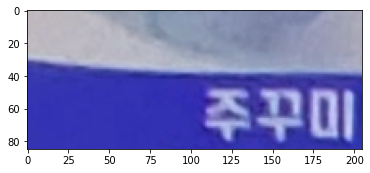

In [26]:
# 이미지 파일 경로
image_path = f"/home/work/Vision/data/Training/image/daegu/{image_names[0]}"  # 이미지 파일 경로를 업데이트하세요.

# 라벨 정보
label_info = label['annotations'][0]
label_meta = label['meta']

# 이미지 열기
image = cv2.imread(image_path)

# 바운딩 박스 정보 가져오기
ocr_info = label_info['ocr']
x = ocr_info['x']
y = ocr_info['y']
width = ocr_info['width']
height = ocr_info['height']
rotation = ocr_info['rotation']

# 이미지 크기 가져오기
image_width = label_meta['image_original_width']
image_height = label_meta['image_original_height']

# 바운딩 박스의 중심 좌표
center_x = x * image_width / 100
center_y = y * image_height / 100

# 바운딩 박스의 반 너비와 높이
half_width = width * image_width / 100 #/ 2
half_height = height * image_height / 100 #/ 2

# 회전 각도 (라디안으로 변환)
rotation_angle = rotation

# 회전 변환 매트릭스 생성
rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1)

# 이미지 회전
rotated_image = cv2.warpAffine(image, rotation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

# 바운딩 박스 영역 추출
left = int(center_x - half_width)
top = int(center_y - half_height)
right = int(center_x + half_width)
bottom = int(center_y + half_height)

# 바운딩 박스 영역을 화면에 보여주기
cropped_image = rotated_image[top:bottom, left:right]
plt.imshow(cropped_image)
plt.show()


# Bbox 별로 별도 저장

In [27]:
texts = []
num = 1
for image, j in zip(image_names, json_names):

        label = json.load(open(f'/home/work/Vision/data/Training/label/daegu_label/{j}'))
        img = cv2.imread(f'/home/work/Vision/data/Training/image/daegu/{image}')
        meta = label['meta']
        # 이미지 크기 
        image_width = meta['image_original_width']
        image_height = meta['image_original_height']
        box_type = meta['boundary_coordinates']['box_type']
        
        for i in range(len(label['annotations'])):

            label_info = label['annotations'][i]['ocr']

            # 바운딩 박스 정보 
            x = label_info['x']
            y = label_info['y']
            width = label_info['width']
            height = label_info['height']
            rotation = label_info['rotation']
            
            if x <=0 or y <=0 or width <= 0 or height <=0: # 좌표 예외처리
                pass
            
            else:

                # 바운딩 박스의 중심 좌표
                center_x = x * image_width / 100
                center_y = y * image_height / 100

                # 바운딩 박스의 반 너비와 높이
                half_width = width * image_width / 100 
                half_height = height * image_height / 100 

                # 회전 각도 (라디안으로 변환)
                rotation_angle = rotation

                # 회전 변환 매트릭스 생성
                rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1)

                # 이미지 회전
                rotated_image = cv2.warpAffine(img, rotation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

                # 바운딩 박스 영역 추출

                left = int(max(center_x - half_width, 0))
                top = int(max(center_y - half_height, 0))
                right = int(min(center_x + half_width, image_width))
                bottom = int(min(center_y + half_height, image_height))


                cropped_image = rotated_image[top:bottom, left:right]


                cropped_image = Image.fromarray(cropped_image)
                cropped_image.save(f"/home/work/Vision/data/Training/image/daegu_bbox/words_{num}.jpg")
                texts.append(label_info['text'])
                
                num+=1


In [28]:
len(texts)

83163

In [29]:
texts[0]

'주꾸미'

In [30]:
file_name = '/home/work/Vision/data/gt.txt'

with open(file_name, 'w') as file:
    for num, i in enumerate(texts):
        file.write(f'words_{num+1}.jpg\t{i}\n')


In [31]:
file_name = '/home/work/Vision/data/gt.txt'

f = open(file_name, 'r')
lines = f.readlines()
for line in lines:
    print(line)
f.close()

words_0.jpg	주꾸미

words_1.jpg	매운주꾸미

words_2.jpg	한치

words_3.jpg	스파이시한치

words_4.jpg	초고등어

words_5.jpg	구운게장

words_6.jpg	게맛살

words_7.jpg	계란초밥

words_8.jpg	계란초밥(케찹)

words_9.jpg	계란구이

words_10.jpg	계란구이(케찹)

words_11.jpg	계란구이새우사라다

words_12.jpg	따뜻한계란구이

words_13.jpg	따뜻한계란구이

words_14.jpg	문어와사비군함

words_15.jpg	게장

words_16.jpg	새우사라다

words_17.jpg	오징어사라다

words_18.jpg	콘

words_19.jpg	튜나마요군함

words_20.jpg	빨간날치알

words_21.jpg	소불고기날치알군함

words_22.jpg	바지락군함

words_23.jpg	북방조개사라다

words_24.jpg	명란마요군함

words_25.jpg	회무침

words_26.jpg	튜나콘

words_27.jpg	소불고기날치알유부

words_28.jpg	치킨갈릭마요군함

words_29.jpg	닭꼬치군함

words_30.jpg	유부콤보(튜나&콘)

words_31.jpg	소불고기유부

words_32.jpg	소불고기군함

words_33.jpg	유부

words_34.jpg	코코넛쉬림프

words_35.jpg	새우후라이

words_36.jpg	치킨텐더

words_37.jpg	순살양념치킨

words_38.jpg	순살후라이드치킨

words_39.jpg	모듬새우튀김

words_40.jpg	야끼토리(갈릭마요)

words_41.jpg	야끼토리

words_42.jpg	한입핫도그

words_43.jpg	치즈볼

words_44.jpg	통새우짜조롤

words_45.jpg	수제모짜렐라치즈스틱

words_46.jpg	우유튀김

words_47.jpg	감자튀김(양파)

words_48.jpg	감자튀김(칠리


words_2766.jpg	소고기쌈밥샤브샤브

words_2767.jpg	소고기반반샤브샤브

words_2768.jpg	쌈밥추가

words_2769.jpg	고기추가

words_2770.jpg	쌀국수사리

words_2771.jpg	야채추가

words_2772.jpg	공기밥

words_2773.jpg	면추가

words_2774.jpg	소고기쌀국수

words_2775.jpg	팟타이

words_2776.jpg	분짜

words_2777.jpg	나가사키쌀국수

words_2778.jpg	똠양꿍

words_2779.jpg	곱창국수

words_2780.jpg	월남쌈

words_2781.jpg	뿌팟퐁커리

words_2782.jpg	유린기

words_2783.jpg	카오팟

words_2784.jpg	껌랑보

words_2785.jpg	나시고랭

words_2786.jpg	짜조

words_2787.jpg	텃만꿍

words_2788.jpg	수제고로케

words_2789.jpg	모듬까스

words_2790.jpg	새우까스

words_2791.jpg	등심까스

words_2792.jpg	치즈까스

words_2793.jpg	안심까스

words_2794.jpg	야끼카레

words_2795.jpg	소세지카레

words_2796.jpg	등심카레

words_2797.jpg	안심카레

words_2798.jpg	새우카레

words_2799.jpg	카레라이스

words_2800.jpg	우동으로변경시

words_2801.jpg	냉모밀/우동만찬세트

words_2802.jpg	1인만찬세트

words_2803.jpg	안심2장으로변경시

words_2804.jpg	소세지카레우동

words_2805.jpg	안심카레우동

words_2806.jpg	새우카레우동

words_2807.jpg	등심카레우동

words_2808.jpg	카레우동

words_2809.jpg	소세지

words_2810.jpg	카레추가

words_2811.jpg	감자한우고로케


words_5614.jpg	삼선우동

words_5615.jpg	라조기

words_5616.jpg	잡탕밥

words_5617.jpg	해물짬뽕

words_5618.jpg	삼선간짜장

words_5619.jpg	짜장면

words_5620.jpg	사천짜장

words_5621.jpg	우동

words_5622.jpg	유니짜장

words_5623.jpg	짬뽕

words_5624.jpg	삼선우동

words_5625.jpg	간짜장

words_5626.jpg	울면

words_5627.jpg	기스면

words_5628.jpg	야끼우동

words_5629.jpg	라조면

words_5630.jpg	잡탕면

words_5631.jpg	삼선짜장

words_5632.jpg	볶음밥

words_5633.jpg	마파덮밥

words_5634.jpg	짜장밥

words_5635.jpg	새우볶음밥

words_5636.jpg	짬뽕밥

words_5637.jpg	야끼밥

words_5638.jpg	오므라이스

words_5639.jpg	고추덮밥

words_5640.jpg	잡채밥

words_5641.jpg	유산슬밥

words_5642.jpg	중화비빔밥

words_5643.jpg	잡탕밥

words_5644.jpg	삼선볶음밥

words_5645.jpg	탕수육

words_5646.jpg	유산슬

words_5647.jpg	깐풍기

words_5648.jpg	깐풍육

words_5649.jpg	잡채

words_5650.jpg	라조육

words_5651.jpg	양장피

words_5652.jpg	고추잡채

words_5653.jpg	팔보채

words_5654.jpg	잡탕

words_5655.jpg	깐쇼새우

words_5656.jpg	탕수만두

words_5657.jpg	군만두

words_5658.jpg	짜장면

words_5659.jpg	야끼우동

words_5660.jpg	해물짬뽕

words_5661.jpg	우동

words_5662.jpg	쟁반짜장




words_8265.jpg	유부

words_8266.jpg	계란

words_8267.jpg	묵은지광어초밥

words_8268.jpg	생연어초밥

words_8269.jpg	구운연어초밥

words_8270.jpg	2인세트

words_8271.jpg	소고기초밥

words_8272.jpg	1인세트

words_8273.jpg	불(火)초밥

words_8274.jpg	간장새우초밥

words_8275.jpg	2인든든세트

words_8276.jpg	새우모듬초밥

words_8277.jpg	치즈돈까스변경시

words_8278.jpg	새우초밥

words_8279.jpg	1인든든세트

words_8280.jpg	크래미초밥

words_8281.jpg	가리비초밥

words_8282.jpg	2인점보세트

words_8283.jpg	계란초밥

words_8284.jpg	유부초밥

words_8285.jpg	모듬

words_8286.jpg	더블등심가츠

words_8287.jpg	광어

words_8288.jpg	통치즈롤

words_8289.jpg	우동

words_8290.jpg	연어

words_8291.jpg	매콤우동

words_8292.jpg	모듬가츠

words_8293.jpg	새우튀김우동

words_8294.jpg	김치해물우동

words_8295.jpg	미니우동

words_8296.jpg	하이볼

words_8297.jpg	돈까스샐러드

words_8298.jpg	클라우드생맥주

words_8299.jpg	연어샐러드

words_8300.jpg	맥주

words_8301.jpg	소주

words_8302.jpg	새우가츠

words_8303.jpg	청하

words_8304.jpg	치킨가라아게

words_8305.jpg	콜라

words_8306.jpg	고로케

words_8307.jpg	스프라이트

words_8308.jpg	웰치스

words_8309.jpg	쿠로우시프리미엄우메슈

words_8310.jpg	우메센닌모지코우바나나

wo

words_12264.jpg	불낙죽

words_12265.jpg	명란알콘탕

words_12266.jpg	차돌치즈감자전

words_12267.jpg	삼겹살김치전

words_12268.jpg	치즈감자튀김&샐러드

words_12269.jpg	페페로니계란후라이

words_12270.jpg	차돌마라전골

words_12271.jpg	알곤추가

words_12272.jpg	알추가

words_12273.jpg	곤추가

words_12274.jpg	라면사리

words_12275.jpg	육회

words_12276.jpg	우삼겹+아채+분모자+당면

words_12277.jpg	우삼겹(80g)+숙주

words_12278.jpg	돌문어숙회

words_12279.jpg	야채+분모자+당면추가

words_12280.jpg	육회비빔밥

words_12281.jpg	차돌박이숙주볶음

words_12282.jpg	햇반

words_12283.jpg	삼겹볶음두부김치

words_12284.jpg	막걸셋트

words_12285.jpg	육회셋트

words_12286.jpg	문어셋트

words_12287.jpg	영덕대게장세트

words_12288.jpg	해물세트

words_12289.jpg	오삼두부두루치기세트

words_12290.jpg	콩국수세트

words_12291.jpg	수육세트

words_12292.jpg	숨쉬는세트

words_12293.jpg	영덕대게장순두부

words_12294.jpg	해물순두부

words_12295.jpg	건강순두부

words_12296.jpg	김치순두부

words_12297.jpg	짬뽕순두부

words_12298.jpg	굴매생이순두부

words_12299.jpg	어린이세트

words_12300.jpg	두부돈가스

words_12301.jpg	매일삶는수육

words_12302.jpg	스프라이트

words_12303.jpg	웰치스

words_12304.jpg	슈웹스

words_12305.jpg	콜라

words_12


words_15764.jpg	순두부찌개

words_15765.jpg	청국장찌개

words_15766.jpg	비빔밥

words_15767.jpg	철판낙지

words_15768.jpg	철판제육

words_15769.jpg	공기밥

words_15770.jpg	소주

words_15771.jpg	맥주

words_15772.jpg	전통육개장

words_15773.jpg	국수육개장

words_15774.jpg	우거지육개장

words_15775.jpg	낙지볶음

words_15776.jpg	제육볶음

words_15777.jpg	고기만두

words_15778.jpg	찜갈비한우

words_15779.jpg	찜갈비수입

words_15780.jpg	소고기찌개

words_15781.jpg	뼈다귀해장국

words_15782.jpg	뼈큰선지해장국

words_15783.jpg	소머리곰탕

words_15784.jpg	고기많은곰탕

words_15785.jpg	내장탕

words_15786.jpg	영계약백숙

words_15787.jpg	한방삼계탕

words_15788.jpg	전복삼계탕

words_15789.jpg	불고기

words_15790.jpg	음료수

words_15791.jpg	엄마밥상

words_15792.jpg	고등어

words_15793.jpg	소주

words_15794.jpg	찌개추가

words_15795.jpg	맥주

words_15796.jpg	육개장

words_15797.jpg	콩나물밥

words_15798.jpg	추어탕

words_15799.jpg	돼지수육

words_15800.jpg	묵채

words_15801.jpg	호박전

words_15802.jpg	고추전

words_15803.jpg	버섯전

words_15804.jpg	파전

words_15805.jpg	칼국수

words_15806.jpg	비빔밥

words_15807.jpg	해물칼국수

words_15808.jpg	된장비빔밥

words_15809.


words_18850.jpg	막걸리

words_18851.jpg	당면

words_18852.jpg	백세주

words_18853.jpg	라면

words_18854.jpg	화랑

words_18855.jpg	야채

words_18856.jpg	음료수

words_18857.jpg	공기밥

words_18858.jpg	우동

words_18859.jpg	소주4병

words_18860.jpg	돼지두루치기

words_18861.jpg	코다리찜

words_18862.jpg	돼지껍데기

words_18863.jpg	두부김치

words_18864.jpg	뼈없는닭발

words_18865.jpg	칼국수

words_18866.jpg	꼬막무침

words_18867.jpg	해물파전

words_18868.jpg	잔치국수

words_18869.jpg	땡초부추전

words_18870.jpg	백반정식(된장찌개)

words_18871.jpg	김치찌개

words_18872.jpg	동태찌개

words_18873.jpg	막걸리

words_18874.jpg	쌀막걸리

words_18875.jpg	소주

words_18876.jpg	맥주

words_18877.jpg	음료수

words_18878.jpg	메기불고기

words_18879.jpg	갈아서추어탕

words_18880.jpg	보해복분자주

words_18881.jpg	통마리추어탕

words_18882.jpg	매취순

words_18883.jpg	메기매운탕

words_18884.jpg	미꾸라지튀김

words_18885.jpg	보해순희

words_18886.jpg	추어두부전골

words_18887.jpg	백세주

words_18888.jpg	소주

words_18889.jpg	수제비사리

words_18890.jpg	맥주

words_18891.jpg	음료수

words_18892.jpg	공기밥

words_18893.jpg	갈비맛수제양념목살

words_18894.jpg	불향쭈꾸미또는불향삼겹볶음세트

words_22006.jpg	복튀김

words_22007.jpg	대구뽈찜

words_22008.jpg	해물찜

words_22009.jpg	소주

words_22010.jpg	복어찜

words_22011.jpg	맥주

words_22012.jpg	아구찜

words_22013.jpg	음료

words_22014.jpg	가오리찜

words_22015.jpg	공기밥

words_22016.jpg	대구튀김(뽈살,뱃살)

words_22017.jpg	볶음밥

words_22018.jpg	라면사리

words_22019.jpg	머리고기수육

words_22020.jpg	직화불고기비빔밥

words_22021.jpg	두부조림

words_22022.jpg	섞어돼지

words_22023.jpg	물냉면

words_22024.jpg	섞어순대

words_22025.jpg	비빔냉면

words_22026.jpg	목살수육

words_22027.jpg	살코기돼지

words_22028.jpg	수육백반

words_22029.jpg	고기물냉면

words_22030.jpg	살코기순대

words_22031.jpg	고기비빔냉면

words_22032.jpg	순대만

words_22033.jpg	왕만두

words_22034.jpg	카스

words_22035.jpg	테라

words_22036.jpg	잔치국수

words_22037.jpg	야채순대

words_22038.jpg	진로

words_22039.jpg	참이슬

words_22040.jpg	참소주

words_22041.jpg	순대전골

words_22042.jpg	잔치육국수

words_22043.jpg	북성로불고기

words_22044.jpg	막걸리

words_22045.jpg	콜라

words_22046.jpg	사이다

words_22047.jpg	우육탕면

words_22048.jpg	장어구이

words_22049.jpg	장어구이곰탕

words_22050.jpg	장어곰탕

words_22051.jp


words_24098.jpg	복어삼계탕

words_24099.jpg	라면사리

words_24100.jpg	낙지추가

words_24101.jpg	복어해물전골

words_24102.jpg	코다리찜

words_24103.jpg	갈비만두

words_24104.jpg	아구찜

words_24105.jpg	새우만두

words_24106.jpg	맥주

words_24107.jpg	소주

words_24108.jpg	청하

words_24109.jpg	막걸리

words_24110.jpg	음료수

words_24111.jpg	진안인삼

words_24112.jpg	물오징어

words_24113.jpg	불닭발

words_24114.jpg	두부김치

words_24115.jpg	오뎅탕

words_24116.jpg	계란탕

words_24117.jpg	돼지불고기

words_24118.jpg	돼지찌개

words_24119.jpg	각종과일

words_24120.jpg	소주

words_24121.jpg	맥주

words_24122.jpg	탁주

words_24123.jpg	음료수

words_24124.jpg	트러플전복죽

words_24125.jpg	전복내장죽

words_24126.jpg	전복죽

words_24127.jpg	진전복내장죽

words_24128.jpg	진전복죽

words_24129.jpg	특전복내장죽

words_24130.jpg	특전복죽

words_24131.jpg	능이삼계죽

words_24132.jpg	삼계전복죽

words_24133.jpg	홍게품은죽

words_24134.jpg	삼계죽

words_24135.jpg	쇠고기미역죽

words_24136.jpg	불낙죽

words_24137.jpg	쇠고기버섯죽

words_24138.jpg	쇠고기야채죽

words_24139.jpg	참치야채죽

words_24140.jpg	새우죽

words_24141.jpg	7가지야채죽

words_24142.jpg	해물죽

words_2414


words_27762.jpg	단팥죽

words_27763.jpg	녹두죽

words_27764.jpg	가평잣죽

words_27765.jpg	흑임자죽

words_27766.jpg	코다리조림

words_27767.jpg	고기만두

words_27768.jpg	냉면

words_27769.jpg	비빔면

words_27770.jpg	점심특선

words_27771.jpg	소주

words_27772.jpg	새우볶음밥

words_27773.jpg	맥주

words_27774.jpg	돈까스

words_27775.jpg	막걸리

words_27776.jpg	청하

words_27777.jpg	문어추가

words_27778.jpg	동태전골

words_27779.jpg	설중매

words_27780.jpg	시래기우거지

words_27781.jpg	백세주

words_27782.jpg	납작만두

words_27783.jpg	화랑

words_27784.jpg	떡사리

words_27785.jpg	복분자

words_27786.jpg	소면

words_27787.jpg	우동

words_27788.jpg	라면

words_27789.jpg	음료수

words_27790.jpg	공기밥

words_27791.jpg	오징어볶음

words_27792.jpg	왕새우튀김

words_27793.jpg	문어튀김

words_27794.jpg	감자찐만두

words_27795.jpg	빨간국밥

words_27796.jpg	수육

words_27797.jpg	야채비빔밥

words_27798.jpg	빨간돼지찌개

words_27799.jpg	주류

words_27800.jpg	음료

words_27801.jpg	육국수

words_27802.jpg	메밀막국수

words_27803.jpg	코다리비빔국수

words_27804.jpg	빨간국3인분

words_27805.jpg	돼지수육

words_27806.jpg	돼지국밥

words_27807.jpg	막창순대

words

words_30736.jpg	육개장

words_30737.jpg	사골만두국

words_30738.jpg	된장찌개+제육or오징어볶음찬4종

words_30739.jpg	순두부찌개+제육볶음or오징어볶음찬4종

words_30740.jpg	청국장+제육볶음or오징어볶음찬4종

words_30741.jpg	계란후라이

words_30742.jpg	공기밥

words_30743.jpg	계란말이

words_30744.jpg	스팸구이

words_30745.jpg	콜라

words_30746.jpg	사이다

words_30747.jpg	웰치스

words_30748.jpg	칭따오무알콜

words_30749.jpg	베이비아이리쉬샷

words_30750.jpg	카프리

words_30751.jpg	모히또

words_30752.jpg	나쵸

words_30753.jpg	칭따오

words_30754.jpg	준벅

words_30755.jpg	아사히

words_30756.jpg	황도+후르츠

words_30757.jpg	블루하와이

words_30758.jpg	산미구엘

words_30759.jpg	버터오다리+나쵸

words_30760.jpg	스텔라

words_30761.jpg	진토닉

words_30762.jpg	호가든보타닉

words_30763.jpg	먹태

words_30764.jpg	미도리사워

words_30765.jpg	코로나

words_30766.jpg	갓파더

words_30767.jpg	아귀포

words_30768.jpg	호가든

words_30769.jpg	갓마더

words_30770.jpg	버드와이저

words_30771.jpg	노가리

words_30772.jpg	블루라군

words_30773.jpg	하이네켄

words_30774.jpg	카타르시스

words_30775.jpg	국물떡볶이

words_30776.jpg	블랑

words_30777.jpg	롱아일랜드아이스티

words_30778.jpg	모듬쏘세지

words_3077


words_33782.jpg	스팸김치볶음밥

words_33783.jpg	스팸철판볶음밥

words_33784.jpg	소불고기철판볶음밥

words_33785.jpg	치즈닭갈비덮밥

words_33786.jpg	핫치즈닭갈비덮밥

words_33787.jpg	마파두부덮밥

words_33788.jpg	숯불직화구이덮밥

words_33789.jpg	왕카레돈까스덮밥

words_33790.jpg	새우돈까스덮밥

words_33791.jpg	돈가스덮밥

words_33792.jpg	시골제육두부강된장

words_33793.jpg	소불고기감초고추장

words_33794.jpg	참치야채감초고추장

words_33795.jpg	돈까스카레

words_33796.jpg	김치부대찌개

words_33797.jpg	한솥묵은지김치찌개

words_33798.jpg	한솥튼튼도시락

words_33799.jpg	후라이드순살

words_33800.jpg	후라이드순살(소)_양념치킨

words_33801.jpg	후라이드순살(소)_케이준

words_33802.jpg	닭강정

words_33803.jpg	반찬(김치부대찌개)

words_33804.jpg	반찬(토네이도소세지)

words_33805.jpg	반찬(묵은지김치찌개)

words_33806.jpg	반찬(고등어데리야끼)

words_33807.jpg	반찬(제육볶음)

words_33808.jpg	반찬(고기고기)

words_33809.jpg	반찬(치킨)

words_33810.jpg	반찬(돈까스도련님)

words_33811.jpg	반찬(돈까스)

words_33812.jpg	반찬(계란말이)

words_33813.jpg	반찬(카레)

words_33814.jpg	한솥완도미역국

words_33815.jpg	한솥미소된장국

words_33816.jpg	한솥황태해장국

words_33817.jpg	한솥매콤해물된장국

words_33818.jpg	한솥시금치된장국

words_33819.jpg	한솥콩나물북어국

words_33820

words_37046.jpg	매콤오징어덮밥

words_37047.jpg	바삭왕새우덮밥

words_37048.jpg	치낙볶음밥

words_37049.jpg	치칸빠다밥

words_37050.jpg	아메리카노

words_37051.jpg	통큰1리터커피

words_37052.jpg	카페라떼

words_37053.jpg	바닐라라떼

words_37054.jpg	카라멜마끼아또

words_37055.jpg	복숭커피

words_37056.jpg	통큰1리터복숭커피

words_37057.jpg	카페모카

words_37058.jpg	연유라떼

words_37059.jpg	아이스티(복숭아/레몬)

words_37060.jpg	에이드(한라봉/청포도/열대과일)

words_37061.jpg	통큰1리터에이드(한라봉/청포도/열대과일)

words_37062.jpg	핫초코/아이스초코

words_37063.jpg	미쑤까루

words_37064.jpg	단호박식혜

words_37065.jpg	쿨다방(파인애플/복숭아)

words_37066.jpg	콜라

words_37067.jpg	사이다

words_37068.jpg	히레단품

words_37069.jpg	히레냉메밀정식

words_37070.jpg	히레댓짱정식

words_37071.jpg	히레장군우동정식

words_37072.jpg	히레온메밀정식

words_37073.jpg	로스단품

words_37074.jpg	로스냉메밀정식

words_37075.jpg	로스댓짱정식

words_37076.jpg	로스장군우동정식

words_37077.jpg	로스온메밀정식

words_37078.jpg	치킨단품

words_37079.jpg	치킨냉메밀정식

words_37080.jpg	치킨댓짱정식

words_37081.jpg	치킨장군우동정식

words_37082.jpg	치킨온메밀정식

words_37083.jpg	쎄미냉메밀정식

words_37084.jpg	쎄미댓짱정식

words_37085.jpg	쎄미장군우동정식

wor


words_40260.jpg	찐만두

words_40261.jpg	칼국수

words_40262.jpg	부추전

words_40263.jpg	촌두부

words_40264.jpg	비빔국수

words_40265.jpg	콩국수

words_40266.jpg	소주

words_40267.jpg	수제비

words_40268.jpg	맥주

words_40269.jpg	칼제비

words_40270.jpg	막걸리

words_40271.jpg	만두국

words_40272.jpg	음료수

words_40273.jpg	떡국

words_40274.jpg	공기밥

words_40275.jpg	떡만두국

words_40276.jpg	참숯통닭발

words_40277.jpg	참숯뼈없는닭발

words_40278.jpg	국물닭발

words_40279.jpg	튀김만두

words_40280.jpg	치즈

words_40281.jpg	야채볶음닭발

words_40282.jpg	김말이

words_40283.jpg	당면

words_40284.jpg	오징어

words_40285.jpg	햄

words_40286.jpg	참숯닭날개

words_40287.jpg	모듬튀김

words_40288.jpg	계란

words_40289.jpg	메추리알

words_40290.jpg	불똥집

words_40291.jpg	엽기닭도리

words_40292.jpg	오돌뼈

words_40293.jpg	돼지석쇠불고기

words_40294.jpg	공기밥

words_40295.jpg	엽기세트C

words_40296.jpg	엽기세트B

words_40297.jpg	엽기세트A

words_40298.jpg	계란찜추가

words_40299.jpg	주먹김밥

words_40300.jpg	엽기떡볶이

words_40301.jpg	누룽지탕

words_40302.jpg	계란야채죽

words_40303.jpg	엽기오뎅

words_40304.jpg	오뎅탕

words_40305.jpg	원조할매Set1

words_42114.jpg	수육

words_42115.jpg	옛날손칼국수

words_42116.jpg	메밀칼국수

words_42117.jpg	메밀만두

words_42118.jpg	메밀들깨칼국수

words_42119.jpg	메밀전병

words_42120.jpg	메밀부추전

words_42121.jpg	메밀버섯전

words_42122.jpg	냉메밀묵채

words_42123.jpg	메밀묵골패

words_42124.jpg	냉메밀막국수

words_42125.jpg	골뱅이묵무침

words_42126.jpg	메밀비빔국수

words_42127.jpg	메밀굴전

words_42128.jpg	냉메밀콩국수

words_42129.jpg	막걸리

words_42130.jpg	맥주

words_42131.jpg	메밀떡만두국

words_42132.jpg	봉평메밀막걸리

words_42133.jpg	소주

words_42134.jpg	찹쌀수제비

words_42135.jpg	동동주

words_42136.jpg	음료수

words_42137.jpg	매생이굴국밥

words_42138.jpg	물냉면

words_42139.jpg	순두부찌개

words_42140.jpg	비빔냉면

words_42141.jpg	고봉민돈까스

words_42142.jpg	고상한쌈

words_42143.jpg	치즈돈까스

words_42144.jpg	냉모밀

words_42145.jpg	육개장한상

words_42146.jpg	고구마치즈돈까스

words_42147.jpg	떡국

words_42148.jpg	소불고기덮밥

words_42149.jpg	돌판비빔밥

words_42150.jpg	닭곰탕한상

words_42151.jpg	된장돈불고기덮밥

words_42152.jpg	오므라이스

words_42153.jpg	고봉민돼지국밥

words_42154.jpg	비빔만두

words_42155.jpg	납작탕수육

words_42156.jpg	만둣국

words_42157.jpg	우동




words_45259.jpg	새우까스

words_45260.jpg	치즈롤까스세

words_45261.jpg	콤보세트

words_45262.jpg	하레까스(안심)세트

words_45263.jpg	사골반반

words_45264.jpg	사골만두국수

words_45265.jpg	사골국수

words_45266.jpg	멸치국수

words_45267.jpg	직화불고기비빔국수

words_45268.jpg	간비국수

words_45269.jpg	얼큰멸치국수

words_45270.jpg	만두국수

words_45271.jpg	코다리비빔국수

words_45272.jpg	비빔국수

words_45273.jpg	명란마요미니밥

words_45274.jpg	냉국수

words_45275.jpg	제육미니밥

words_45276.jpg	미정미니밥

words_45277.jpg	참치미니밥

words_45278.jpg	사골반반곱빼기

words_45279.jpg	사골만두국수곱빼기

words_45280.jpg	사골국수곱빼기

words_45281.jpg	멸치국수곱빼기

words_45282.jpg	간비국수곱빼기

words_45283.jpg	비빔국수곱빼기

words_45284.jpg	얼큰멸치국수곱빼기

words_45285.jpg	만두국수곱빼기

words_45286.jpg	명란마요미니밥

words_45287.jpg	제육미니밥

words_45288.jpg	미정미니밥

words_45289.jpg	구운계란

words_45290.jpg	냉국수곱빼기

words_45291.jpg	쫀득해만두

words_45292.jpg	갈비쫀득해만두

words_45293.jpg	참치미니밥

words_45294.jpg	제육덮밥

words_45295.jpg	간장불고기덮밥

words_45296.jpg	매콤참지덮밥

words_45297.jpg	김치제육덮밥

words_45298.jpg	미니멸치세트

words_45299.jpg	제육덮밥미니냉세트

words_45300.jpg	구운

words_48397.jpg	탄두리띠까

words_48398.jpg	푸팟퐁커리

words_48399.jpg	치킨커리

words_48400.jpg	커리포키돈

words_48401.jpg	타마린드새우

words_48402.jpg	비프커리

words_48403.jpg	해물야끼볶음밥

words_48404.jpg	새우커리

words_48405.jpg	커리삼겹볶음밥

words_48406.jpg	난

words_48407.jpg	밥

words_48408.jpg	바이올렛인디아

words_48409.jpg	피제리아탄두리

words_48410.jpg	미고랭

words_48411.jpg	모자렐라짜파티

words_48412.jpg	인디쉬림프샐러드

words_48413.jpg	오리엔탈

words_48414.jpg	하우스샐러드

words_48415.jpg	친퀘테레식해산물리조또

words_48416.jpg	카프레제샐러드

words_48417.jpg	버섯크림리조또

words_48418.jpg	스파이스치킨윙

words_48419.jpg	모듬감자튀김

words_48420.jpg	밀라노식쇠고기스테이크

words_48421.jpg	안심

words_48422.jpg	오늘의샐러드

words_48423.jpg	채끝

words_48424.jpg	앤쵸비오일파스타

words_48425.jpg	핏짜마르게리따

words_48426.jpg	까르보나라로마냐

words_48427.jpg	핏짜프로슈또루꼴라

words_48428.jpg	까르보나라크림파스타

words_48429.jpg	핏짜디아볼라

words_48430.jpg	친퀘테레식해산물파스타

words_48431.jpg	핏짜고르곤졸라

words_48432.jpg	모시조개봉골레파스타

words_48433.jpg	와인Wine

words_48434.jpg	제노베제바질페스토크림파스타

words_48435.jpg	맥주Beer

words_48436.jpg	스파게티아라비아따

words_48437.jpg	커피C

words_51469.jpg	매화수

words_51470.jpg	토닉워터

words_51471.jpg	파인애플샤베트

words_51472.jpg	치킨마요덮밥

words_51473.jpg	오징어숙회

words_51474.jpg	간장계란밥

words_51475.jpg	큐브골드파인애플

words_51476.jpg	우동

words_51477.jpg	공기밥

words_51478.jpg	큐브수박

words_51479.jpg	타코와사비

words_51480.jpg	감자버터구이

words_51481.jpg	운동사리

words_51482.jpg	쌀국수

words_51483.jpg	야채사리

words_51484.jpg	계란

words_51485.jpg	숙주사리

words_51486.jpg	고기사리

words_51487.jpg	새우튀김

words_51488.jpg	사천가지튀김

words_51489.jpg	반건오징어

words_51490.jpg	등심김피탕

words_51491.jpg	오다리튀김

words_51492.jpg	먹태

words_51493.jpg	치킨가라아게

words_51494.jpg	통마늘똥집볶음

words_51495.jpg	와사비삼겹두부김치

words_51496.jpg	순살곱도리탕

words_51497.jpg	매콤국물떡볶이

words_51498.jpg	매콤차돌떡볶이

words_51499.jpg	라면사리

words_51500.jpg	볼케이노마라전골

words_51501.jpg	미숫가루화채

words_51502.jpg	치즈사리추가

words_51503.jpg	갈낙찜

words_51504.jpg	갈비찜

words_51505.jpg	돌솥밥

words_51506.jpg	회냉면주문시

words_51507.jpg	실속세트-갈낙찜

words_51508.jpg	실속세트-갈비찜

words_51509.jpg	알찬세트-갈낙찜

words_51510.jpg	알찬세트-갈비찜

words_51511.jpg	파격세트-갈낙찜



words_54889.jpg	홍어

words_54890.jpg	소불고기

words_54891.jpg	곱창전골

words_54892.jpg	나막스찜

words_54893.jpg	육전

words_54894.jpg	파전

words_54895.jpg	육회밥

words_54896.jpg	곤드레밥

words_54897.jpg	돌솥밥

words_54898.jpg	청국장

words_54899.jpg	된장

words_54900.jpg	소주.맥주.청하

words_54901.jpg	화랑.복분자

words_54902.jpg	백세주

words_54903.jpg	음료수

words_54904.jpg	막걸리

words_54905.jpg	양념대창

words_54906.jpg	양념양대창

words_54907.jpg	석쇠불고기

words_54908.jpg	냄비우동

words_54909.jpg	솥뚜껑곱창전골

words_54910.jpg	갈비살

words_54911.jpg	생고기

words_54912.jpg	등심

words_54913.jpg	육회

words_54914.jpg	생삼겹살

words_54915.jpg	불고기

words_54916.jpg	지례

words_54917.jpg	돼지주물럭

words_54918.jpg	맥주

words_54919.jpg	소주

words_54920.jpg	음료수

words_54921.jpg	왕갈비

words_54922.jpg	오뎅탕

words_54923.jpg	해물칼국수

words_54924.jpg	막창

words_54925.jpg	북어콩나물해장국

words_54926.jpg	덜미살

words_54927.jpg	된장찌개

words_54928.jpg	뽈살

words_54929.jpg	오리주물럭

words_54930.jpg	공기밥

words_54931.jpg	돼지김치찌개

words_54932.jpg	소주

words_54933.jpg	음료수

words_54934.jpg	맥주

words_54


words_58508.jpg	청하

words_58509.jpg	누드닭발

words_58510.jpg	양념오징어

words_58511.jpg	음료(콜라/사이다)

words_58512.jpg	누드오징어

words_58513.jpg	막걸리

words_58514.jpg	과메기

words_58515.jpg	돼지껍데기

words_58516.jpg	꼬막

words_58517.jpg	갈비살

words_58518.jpg	굴

words_58519.jpg	생막창

words_58520.jpg	가브리살

words_58521.jpg	삼겹살

words_58522.jpg	갈매기살

words_58523.jpg	목살

words_58524.jpg	생대패삼겹살

words_58525.jpg	항정살

words_58526.jpg	한우생갈비살

words_58527.jpg	된장밥

words_58528.jpg	물냉면

words_58529.jpg	소면

words_58530.jpg	된장찌개

words_58531.jpg	비빔냉면

words_58532.jpg	비빔소면

words_58533.jpg	공기밥

words_58534.jpg	돼지김치찌개

words_58535.jpg	된장소면

words_58536.jpg	맥주

words_58537.jpg	청하

words_58538.jpg	복분자

words_58539.jpg	음료

words_58540.jpg	백세주

words_58541.jpg	소주

words_58542.jpg	통삼겹

words_58543.jpg	통목살

words_58544.jpg	가브리살

words_58545.jpg	항정살

words_58546.jpg	콜라겐벌집껍데기

words_58547.jpg	돈마호크

words_58548.jpg	김치두루치기

words_58549.jpg	소주

words_58550.jpg	맥주

words_58551.jpg	김치찌개

words_58552.jpg	청하

words_58553.jpg	된장찌개

words

words_60346.jpg	꼬들살

words_60347.jpg	막걸리

words_60348.jpg	쪽갈비

words_60349.jpg	복분자

words_60350.jpg	설중매

words_60351.jpg	삼겹양지

words_60352.jpg	음료수

words_60353.jpg	재래식된장찌개

words_60354.jpg	화랑

words_60355.jpg	소주

words_60356.jpg	한우장터국밥

words_60357.jpg	맥주

words_60358.jpg	복분자

words_60359.jpg	공기밥

words_60360.jpg	청하

words_60361.jpg	막걸리

words_60362.jpg	김치말이냉국수

words_60363.jpg	음료수

words_60364.jpg	백세주

words_60365.jpg	국포장

words_60366.jpg	산아나고

words_60367.jpg	장어탕

words_60368.jpg	산꼼장어

words_60369.jpg	돌판된장

words_60370.jpg	산꼼장어야채볶음

words_60371.jpg	된장

words_60372.jpg	밥

words_60373.jpg	돌판주물럭

words_60374.jpg	참이슬(소주)

words_60375.jpg	돼지찌개

words_60376.jpg	테라(맥주)

words_60377.jpg	복분자(보해)

words_60378.jpg	청하

words_60379.jpg	석류주

words_60380.jpg	생삼겹살

words_60381.jpg	음료수

words_60382.jpg	닭발

words_60383.jpg	한우안창살

words_60384.jpg	돌판볶음밥

words_60385.jpg	한우갈비살

words_60386.jpg	소주

words_60387.jpg	맥주

words_60388.jpg	시래기돌판된장

words_60389.jpg	화랑

words_60390.jpg	한우등심

words_60391.jpg	냉면(물)


words_63756.jpg	냉면

words_63757.jpg	된장찌개

words_63758.jpg	갈비탕

words_63759.jpg	한우국밥

words_63760.jpg	삼겹살

words_63761.jpg	어묵탕

words_63762.jpg	목살

words_63763.jpg	우삼겹된장찌개

words_63764.jpg	한우등심

words_63765.jpg	계란찜

words_63766.jpg	이슬

words_63767.jpg	콜라

words_63768.jpg	진로

words_63769.jpg	사이다

words_63770.jpg	카스

words_63771.jpg	환타

words_63772.jpg	청하

words_63773.jpg	하이네켄

words_63774.jpg	공기밥

words_63775.jpg	무알콜칭타오

words_63776.jpg	한우대창모듬한판

words_63777.jpg	A코스

words_63778.jpg	B코스

words_63779.jpg	한우절창

words_63780.jpg	특양밥

words_63781.jpg	라면

words_63782.jpg	우동사리

words_63783.jpg	한우대창

words_63784.jpg	볶음밥

words_63785.jpg	멸치국수

words_63786.jpg	소막창

words_63787.jpg	비빔국수

words_63788.jpg	특양

words_63789.jpg	공기밥

words_63790.jpg	염통

words_63791.jpg	특미

words_63792.jpg	칭따오

words_63793.jpg	소주

words_63794.jpg	연태고량주

words_63795.jpg	맥주

words_63796.jpg	대창전골

words_63797.jpg	음료

words_63798.jpg	청하

words_63799.jpg	흑돼지삼겹

words_63800.jpg	활곰장어양념

words_63801.jpg	뒷고기

words_63802.jpg	김치찌개


words_66458.jpg	주먹밥구이

words_66459.jpg	닭껍질교자

words_66460.jpg	명란크림파스타

words_66461.jpg	베이컨토마토

words_66462.jpg	명란구이

words_66463.jpg	'담'

words_66464.jpg	육수추가

words_66465.jpg	쌀국수추가

words_66466.jpg	고기추가

words_66467.jpg	야채추가

words_66468.jpg	세트추가

words_66469.jpg	'화'

words_66470.jpg	아롱사태마제소바

words_66471.jpg	한우스지조림

words_66472.jpg	황제불낙짬뽕

words_66473.jpg	깻잎치킨

words_66474.jpg	옹기피자

words_66475.jpg	옹기떡볶이

words_66476.jpg	아이스후르츠화채

words_66477.jpg	버터떡구이

words_66478.jpg	스낵크래미

words_66479.jpg	비빔만두

words_66480.jpg	파인샤벳

words_66481.jpg	마늘버터밥

words_66482.jpg	냅다멸치주먹밥

words_66483.jpg	두부김치추가

words_66484.jpg	참이슬

words_66485.jpg	참

words_66486.jpg	진로

words_66487.jpg	카스

words_66488.jpg	테라

words_66489.jpg	청하

words_66490.jpg	심술7,12도

words_66491.jpg	통레몬하이볼

words_66492.jpg	얼그레이하이볼

words_66493.jpg	생맥

words_66494.jpg	레몬생맥

words_66495.jpg	생고기+육회세트

words_66496.jpg	육회

words_66497.jpg	생고기

words_66498.jpg	대창양념

words_66499.jpg	양지머리+오도레기

words_66500.jpg	곱창전골

words_66501.jpg	육회비빔밥

wor


words_70755.jpg	파인애플

words_70756.jpg	해물파전

words_70757.jpg	파인애플샤베트

words_70758.jpg	도담짜파구리

words_70759.jpg	공기밥

words_70760.jpg	모듬감자튀김

words_70761.jpg	라면사리

words_70762.jpg	모듬소세지

words_70763.jpg	우동사리

words_70764.jpg	크림치킨

words_70765.jpg	파스타면

words_70766.jpg	땡초유린기

words_70767.jpg	불닭면

words_70768.jpg	부추삼겹깐풍기

words_70769.jpg	마실꾸지

words_70770.jpg	솔송주

words_70771.jpg	일품안동소주21

words_70772.jpg	일품안동소주40

words_70773.jpg	가야

words_70774.jpg	금정산성

words_70775.jpg	동래아들

words_70776.jpg	순진탁주딸기

words_70777.jpg	복순도가손막걸리

words_70778.jpg	정통감자전

words_70779.jpg	육납무

words_70780.jpg	만두추가

words_70781.jpg	육전추가

words_70782.jpg	두부짜글이

words_70783.jpg	JMT두부김치

words_70784.jpg	해물가득파전

words_70785.jpg	한돈김치전

words_70786.jpg	매실원주

words_70787.jpg	서울의밤

words_70788.jpg	나루(6)

words_70789.jpg	삼양춘탁주

words_70790.jpg	삼양춘약주

words_70791.jpg	얼떨결에

words_70792.jpg	술취한원숭이

words_70793.jpg	술샘16

words_70794.jpg	꿀샘16

words_70795.jpg	호랑이배꼽

words_70796.jpg	담은

words_70797.jpg	서설

words_70798.jpg	밤꽃향기

w


words_73482.jpg	갈릭버터새우구이

words_73483.jpg	통문어튀김

words_73484.jpg	깐풍새우

words_73485.jpg	통베이컨치즈후라이

words_73486.jpg	크림새우

words_73487.jpg	오징어채튀김

words_73488.jpg	새우샐러드

words_73489.jpg	왕오징어튀김

words_73490.jpg	감자튀김

words_73491.jpg	새우전

words_73492.jpg	치즈브라운

words_73493.jpg	쉬림프나쵸

words_73494.jpg	고로케&멘츠카츠

words_73495.jpg	새우튀김

words_73496.jpg	고구마빅치즈스틱

words_73497.jpg	치킨스테이크

words_73498.jpg	모듬구이

words_73499.jpg	베이컨스테이크

words_73500.jpg	불닭볶음

words_73501.jpg	스팸&감자

words_73502.jpg	닭다리살치킨

words_73503.jpg	황태구이

words_73504.jpg	오징어버터구이

words_73505.jpg	깐풍치킨

words_73506.jpg	수제어묵탕

words_73507.jpg	옛날통닭

words_73508.jpg	치킨앤포테이토

words_73509.jpg	부추꼬꼬

words_73510.jpg	죽포함추가

words_73511.jpg	전기구이

words_73512.jpg	닭도리탕

words_73513.jpg	조림닭

words_73514.jpg	동죽조개탕

words_73515.jpg	모듬돈가스

words_73516.jpg	쭈꾸미삼겹살

words_73517.jpg	오징어두루치기

words_73518.jpg	육전

words_73519.jpg	먹태

words_73520.jpg	스팸구이

words_73521.jpg	오뎅탕

words_73522.jpg	소주

words_73523.jpg	맥주

words_73524.jpg	생맥

words_73525.jpg	청하


words_76754.jpg	양념

words_76755.jpg	후라이드+똥집

words_76756.jpg	철구세트

words_76757.jpg	닭떡볶이

words_76758.jpg	반반치킨

words_76759.jpg	후라이드

words_76760.jpg	치즈추가

words_76761.jpg	라면사리

words_76762.jpg	계란

words_76763.jpg	치킨1마리+닭떡볶이(소)+통오징어튀김1마리

words_76764.jpg	뉴치떡세트

words_76765.jpg	마늘간장치킨

words_76766.jpg	양념치킨

words_76767.jpg	허니커리치킨

words_76768.jpg	스파게티면

words_76769.jpg	페퍼로니

words_76770.jpg	비엔나소시지

words_76771.jpg	라면사리

words_76772.jpg	삶은계란

words_76773.jpg	치즈

words_76774.jpg	까비아깝닭

words_76775.jpg	맵닭

words_76776.jpg	옛날통닭

words_76777.jpg	양념,마늘간장,허니커리

words_76778.jpg	케이준감자

words_76779.jpg	통오징어튀김

words_76780.jpg	치즈볼

words_76781.jpg	주먹밥

words_76782.jpg	치떡세트

words_76783.jpg	똥집

words_76784.jpg	닭껍질튀김

words_76785.jpg	치느님세트

words_76786.jpg	치치세트

words_76787.jpg	냄비라면

words_76788.jpg	통새우튀김

words_76789.jpg	신구세트

words_76790.jpg	옛통세트

words_76791.jpg	옛떡세트

words_76792.jpg	코카콜라&스프라이트

words_76793.jpg	소주/맥주

words_76794.jpg	옛날통닭+닭떡볶이

words_76795.jpg	생맥주

words_76796.jpg	황도

words_76797

words_79753.jpg	간장치킨

words_79754.jpg	강정치킨

words_79755.jpg	반반치킨

words_79756.jpg	후라이드+후라이드

words_79757.jpg	멕시핀

words_79758.jpg	매콤한윙

words_79759.jpg	맥시윙

words_79760.jpg	달콤한윙

words_79761.jpg	멕시콤보

words_79762.jpg	간장소스윙

words_79763.jpg	단짠감자치즈볼

words_79764.jpg	더블치즈볼

words_79765.jpg	케이준V컷감자

words_79766.jpg	체다치스볼

words_79767.jpg	나초튀김

words_79768.jpg	새우링

words_79769.jpg	수작미니핫도그

words_79770.jpg	고추튀김

words_79771.jpg	멕시감자

words_79772.jpg	물만두계란탕

words_79773.jpg	가자미구이

words_79774.jpg	소떡

words_79775.jpg	홍합탕

words_79776.jpg	두부김치

words_79777.jpg	시사모구이

words_79778.jpg	맑은오뎅탕

words_79779.jpg	계란찜

words_79780.jpg	돼지김치찌개

words_79781.jpg	물만두

words_79782.jpg	참치김치찌개

words_79783.jpg	삼겹살김치두루치기

words_79784.jpg	계란말이

words_79785.jpg	햄김치찌개

words_79786.jpg	돼지주물럭

words_79787.jpg	부대찌개

words_79788.jpg	소세지야채볶음

words_79789.jpg	대패삼겹살구이

words_79790.jpg	꽃게탕

words_79791.jpg	계란후라이

words_79792.jpg	양념무뼈매운닭발

words_79793.jpg	알곤탕

words_79794.jpg	황도

words_79795.jpg	짬뽕탕

words_79796.jpg	북성로불고기


In [15]:
train_ = int(len(image_files) * 0.7) +1
test_ = int(len(image_files) * 0.15) 
val_ = int(len(image_files) * 0.15)

print(train_, test_, val_)

72835 15607 15607


In [16]:
train_bbox = image_files[:train_]
test_bbox = image_files[train_:train_+test_]
val_bbox = image_files[-val_:]

In [17]:
import shutil

destination_train = '/home/work/Vision/new_data/hyungbin_data/hb_train'
destination_test = '/home/work/Vision/new_data/hyungbin_data/hb_validation'
destination_val = '/home/work/Vision/new_data/hyungbin_data/hb_test'

for file_path in train_bbox:
    shutil.copy(file_path, destination_train)
    
for file_path in test_bbox:
    shutil.copy(file_path, destination_test)
    
for file_path in val_bbox:
    shutil.copy(file_path, destination_val)


In [18]:
file_name = '/home/work/Vision/data/gt.txt'

f = open(file_name, 'r')
lines = f.readlines()

train_line = lines[:train_]
test_line = lines[train_:train_+test_]
val_line = lines[-val_:]

# for line in lines:
#     print(line)
f.close()

In [23]:
test_line[0]

'words_72836.jpg\t크림치즈곶감\n'

In [19]:
file_name = '/home/work/Vision/data/gt.txt'

output_train = '/home/work/Vision/new_data/hyungbin_data/train_gt.txt'
output_test= '/home/work/Vision/new_data/hyungbin_data/test_gt.txt'
output_validation = '/home/work/Vision/new_data/hyungbin_data/validation_gt.txt'

with open(file_name, 'r') as file:
    lines = file.readlines()

train_line = lines[:train_]
test_line = lines[train_:train_+test_]
val_line = lines[-val_:]

#각각의 파트를 새로운 파일에 저장
with open(output_train, 'w') as file1:
    file1.writelines(train_line)

with open(output_test, 'w') as file2:
    file2.writelines(test_line)

with open(output_validation, 'w') as file3:
    file3.writelines(val_line)
